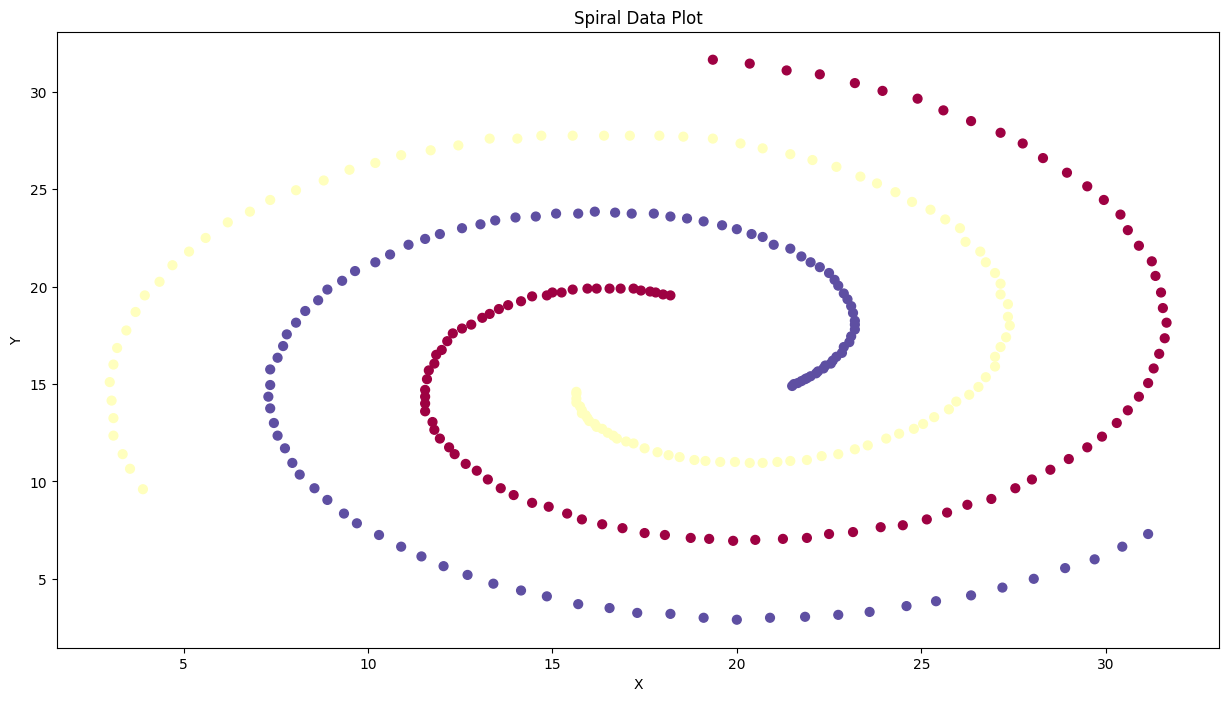

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use the raw URL for the CSV file
url = "https://raw.githubusercontent.com/reisanar/datasets/master/spiral.csv"

# Read the CSV file
df = pd.read_csv(url)

# Plot the data
plt.figure(figsize=(15,8))
plt.scatter(df['X'], df['Y'], c=df['Group'], s=40, cmap=plt.cm.Spectral)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Spiral Data Plot')
plt.show()


In [17]:
df.head(5)

,X,Y,Group
0,31.15,7.30,3
1,30.45,6.65,3
2,29.70,6.00,3
3,28.90,5.55,3
4,28.05,5.00,3


In [10]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Print shapes of the arrays
print("Shape of x:", X.shape)
print("Shape of y:", y.shape)

Shape of x: (311, 2)
Shape of y: (311,)


In [11]:
#OHE of y
from tensorflow.keras.utils import to_categorical
Y_OHE = to_categorical(y)
num_class = Y_OHE.shape[1]
print(num_class)
print(Y_OHE.shape)

4
(311, 4)


In [12]:
# Checking the version of tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


 **Sequential API**
 * The simplest and most straightforward way to build neural networks in TensorFlow by arranging the Keras layers in a sequential order.
 * It can be used when the NN has multiple input and mulyiple output and for layers sharing.
 

In [13]:
# Keras Sequential API
model = keras.Sequential()
model.add(keras.Input(shape=(2,)))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(num_class, activation="softmax"))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               300       
                                                                 
 dense_3 (Dense)             (None, 4)                 404       
                                                                 
Total params: 704 (2.75 KB)
Trainable params: 704 (2.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(optimizer=keras.optimizers.Adam(), 
              loss = keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [16]:
history = model.fit(X, Y_OHE, epochs=10, batch_size=32)

Epoch 1/10
10/10 [==============================] - 1s 2ms/step - loss: 2.9091 - binary_accuracy: 0.6825
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 1.4935 - binary_accuracy: 0.7138
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 1.1344 - binary_accuracy: 0.7186
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 1.0720 - binary_accuracy: 0.7412
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 1.0333 - binary_accuracy: 0.7637
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 1.0086 - binary_accuracy: 0.7637
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 1.0055 - binary_accuracy: 0.7653
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.9921 - binary_accuracy: 0.7685
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 0.9851 - binary_accuracy: 0.7645
Epoch 10/10
10/10 [==============================] - 0s